# PMR3409 - Controle II
# Experiência 2:  Amostragem e reconstrução de sinais

# Identificação

**Aluno 1 :** Alessandro Brugnera Silva          **NUSP:** 10334040

**Aluno 2 :** Vitor Luiz Lima Carazzi       **NUSP:** 9834010

**Turma de Laboratório:** 5 e 2

**Professor:** Newton

**OBS: Você deve submeter o seu relatório em um arquivo compactado contendo os seguintes arquivos:**

- Arquivo *.ipynb.
- Diretório contendo todas as figuras do seu relatório.
- Arquivo *.html equivalente ao seu arquivo *.ipynb. Menu: File -> Download as -> HTML

## 1- Introdução

 Nessa Experiência são explorados dois conceitos básicos do curso:
 - O teorema de Nyquist que constitui ferramenta de análise importante para a escolha do intervalo de amostragem dos sistemas de controle digitais,
 - e a reconstrução de sinais através do reconstrutor de Ordem-Zero que é o reconstrutor utilizado em controle digital.


 **Você deve ler o material contido na Apostila 2 e o Tutorial sobre o teorema de Nyquist e recontrução de sinais contido no arquivo TutorialNyquistReconstrucao.html**

## 2. Teorema da amostragem

 


1-) Estimar o espectro de uma onda senoidal $x(t)$ utilizando o algoritmo FFT com diferentes taxas de amostragem
    $f_a$:
   
- Amostrar a seguinte onda senoidal $x(t) = 2.0 \sin(2\pi 40t)$.
- Utilize o script abaixo.

a-) Utilizar $f_a=400$ amostras/s


b-) Utilizar $f_a=200$ amostras/s


c-) Utilizar $f_a=80$ amostras/s


d-) Utilizar $f_a=60$ amostras/s


e-) Utilizar $f_a=50$ amostras/s


f-) Utilizar $f_a=40$ amostras/s


2-) Preencha a tabela abaixo com os valores obtidos das frequências que foram
    observadas no gráfico do Espectro:

| taxa de amostragem $f_a$ |freq. observada no gráfico do Espectro |
| :-: | :-: |
|400|40|
|200|40|
|80|40|
|60|20|
|50|10
|40|0|

3-) Faça uma análise dos resultados obtidos utilizando o Teorema da Amostragem de Nyquist:

**As taxas de amostragem inferiores a 80 amostras/s começam a apresentar perda de informação no sinal no sinal reconstruído, isso ocorre pois essas taxas são menores que duas vezes a frequência do sinal original, que é de 40 Hz**

4-) Uma maneira de estimar a frequência observada quando um sinal com espectro simples é amostrado com uma
determinada taxa de amostragem é através da utilização de desenhos geométricos realizados manualmente.
Dentro desse contexto, desenhe o espectro do sinal $x(t) = 2.0 \sin(2\pi 40t)$ amostrado com uma
taxa de amostragem $f_a=70$ amostras/s. Obs: o processo de amostragem gera infinitos espectros, desenhe o espectro fundamental (região de frequências positivas e negativas) e mais dois espectros, um a direita e outro a esquerda.
Indique qual pico corresponde à frequência observada.

<img src="Imagens/2.4.jpeg">

5-) Idem para $f_a=30$ amostras/s. Obs: note que nesse caso $f_a < f_s$.

**< insira a imagem do seu desenho aqui >**

<img src="Imagens/2.5.jpeg">



In [1]:
#! pip install scipy.fft

# Script FFT para Onda Senoidal
%matplotlib qt
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy import signal
SampRate = 40                     # Taxa de amostragem
T = 1/SampRate                    # Intervalo de amostragem
Duracao = 5                      # Duracao da amostragem
N = int(Duracao/T)                # Numero de pontos amostrados
t = np.linspace(0.0,Duracao-T,N)  # array de tempo
# Parametros da onda senoidal
A =  2.0                # Amplitude
fsignal =  40           # Frequencia do sinal senoidal Hz
Phi = 0                 # Angulo de fase em radianos
K = 0                   # Constante
# Simulacao da amostragem da onda senoidal
x = K + A * np.sin(2*np.pi*fsignal*t + Phi)
#
# Calculo do Espectro
#
Cn = fft(x)/N;           # Transformada de Fourier Discreta
# print(Cn)
# Modulo
modCn = np.abs(Cn);
#
# Escala de frequencias para o
# grafico do espectro do sinal
# Note que a  escala vai de 0 ate a metade
# da taxa de amostragem.
# A outra metade e' sempre simetrica a primeira.
# Verifique o arquivo TutorialFFT.html
fm = np.linspace(0.0, 1.0/(2.0*T), N//2)
#
# Utilizacao de subplots
# Utiliza-se graficos do tipo "stem"
# mais adequados para o espectro
#plt.figure(1)
plt.figure(figsize=(8,5))
plt.subplots_adjust(hspace=0.8)
plt.subplot(211)
fim = 50
plt.stem(t[1:fim],x[1:fim],use_line_collection=True)
plt.xlabel('tempo (s)')
plt.ylabel('Tensao (V)')
plt.grid()
plt.subplot(212)
plt.stem(fm, modCn[0:N//2],use_line_collection=True)
plt.xlabel('Freq (Hz)')
plt.ylabel('|Cn|')
plt.grid()

C:\Users\vitor\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.


## 3. Reconstrução de sinais 

1-) Seja  o sinal senoidal dado por $x(t) = 2.0 \sin(2\pi 5t)$.
    Amostre o sinal $x(t)$ utilizando uma taxa de amostragem igual a $f_v=50$ amostras/s.
    
Elaborar um código na linguagem Python **(desenvolva o código na célula abaixo)** que gera um gráfico único contendo o sinal $x(t)$, os pontos amostrados de $x(t)$ representados pelo símbolo 'o' e a função $g(t)$ que representa uma função de tempo contínuo que é obtida a partir dos pontos amostrados e um reconstrutor de Ordem-Zero. Faça um gráfico com apenas 2 ciclos de onda senoidal.

**< insira a imagem do gráfico aqui >**   


2-) Calcule o erro quadrático médio entre a função que implementa o reconstrutor de ordem zero $g(t)$
    e a função senoidal $x(t)$. Obs: amostrar as funções $g(t)$ e $x(t)$ com uma taxa de amostragem $f_a=500$ amostras/s e calcular o erro qudrático médio com essas amostras.
	      
**Resposta:     MSE = 0.007853817200909222**

3-) A utilização da função de reconstrução de ordem zero $g(t)$ modifica
    o espectro de frequência do sinal senoidal original $x(t)$.
    Sob o ponto de vista da malha de controle digital significa que o controlador injeta frequências
    distintas na planta quando comparado com a malha de controle de tempo contínuo.
    
Estimar o espectro de frequências da função $g(t)$
          
**< insira a imagem do gráfico aqui >**           

<img src="Imagens/33.PNG">

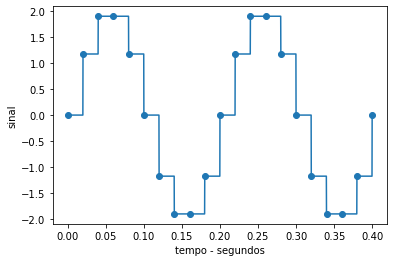

In [9]:
# Desenvolva o seu código aqui
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def x(t):
    return(2*np.sin(2*np.pi*5*t))

def zeroHold(t, deltaT):
    return(2*np.sin(2*np.pi*5*(t-deltaT)))

t=0
coor = []
absc = []
coor.append(x(t))
absc.append(t)
limiteT=.4
while t < limiteT:
    t += 0.02
    coor.append(x(t))
    absc.append(t)

plt.scatter(absc,coor)

new = np.linspace(0, 0.4, num=21, endpoint=True)
f = interp1d(new, coor, kind='previous')

new = np.linspace(0, 0.4, num=2001, endpoint=True)

plt.plot(new, f(new), '-')

plt.xlabel('tempo - segundos')
plt.ylabel('sinal')

plt.show()

In [4]:
# Desenvolva o seu código aqui
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def x(t):
    return(2*np.sin(2*np.pi*5*t))

def zeroHold(t, deltaT):
    return(2*np.sin(2*np.pi*5*(t-deltaT)))

t=0
deltaT = 0.002
yZeroH = [0]
ySignal = [0]
xLista = [0]

limiteT=.4
while t < limiteT:
    t += deltaT
    yZeroH.append(zeroHold(t, deltaT))
    ySignal.append(x(t))
    xLista.append(t)
    

print(np.square(np.subtract(yZeroH,ySignal)).mean())

0.007853817200909222


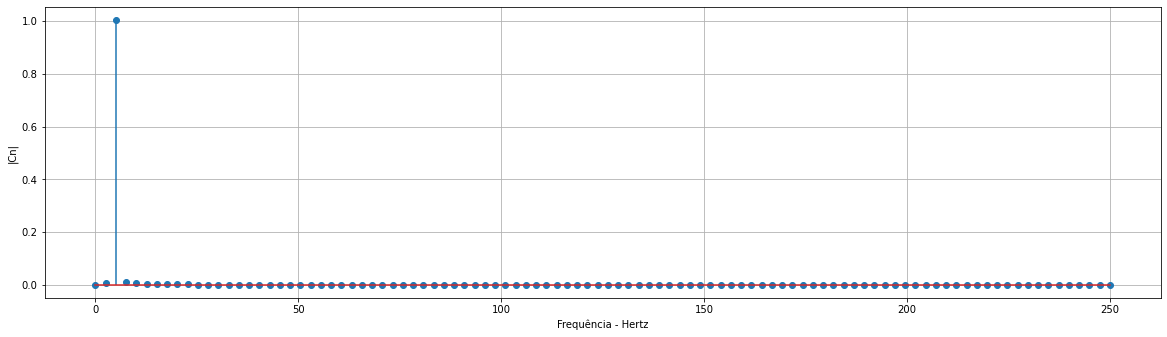

In [7]:
from scipy import fft
import numpy as np

N        = 200
SampRate = 500 # Taxa de amostragem
T        = 1/SampRate # Intervalo de amostragem
tTotal  = 0.4 # Duracao da amostragem
N        = int(tTotal/T) # Amostragem

Cn       = fft.fft(yZeroH)/N;  # Transformada de Fourier Discreta

# Modulo
modCn = np.abs(Cn);

fm = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.8)
plt.subplot(211)
plt.stem(fm, modCn[0:N//2],use_line_collection=True)
plt.xlabel('Frequência - Hertz')
plt.ylabel('|Cn|')
plt.savefig('33.png')
plt.grid()

## 4. Discussões

## 5. Conclusões